In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from common import sample_input, householder_matrix
from plots import plots

np.random.seed(41)
np.set_printoptions(formatter={"float": lambda x: "{0:0.3f}".format(x)})

In [20]:
def sample_sphere(n, d=2):
    """
    Sample n points uniformly from the surface of a d-dimensional sphere.
    """
    points = np.random.normal(size=(n, d))
    points /= np.linalg.norm(points, axis=1, keepdims=True)
    A = np.array([[4, 0], [0, 1]])
    H = householder_matrix(np.array([1, 0]), np.array([-2.8, -0.75]))
    points = points @ A @ H.T
    return points


def sample_rotated(n, d=2):
    """
    Sample n points from a rotated d-dimensional normal distribution.
    """
    X = np.random.normal(loc=(0, 0), scale=(1.7, 1), size=(n, 2))
    # Y = np.random.normal(loc=(2, 2), scale=(0.7, 0.5), size=(n, 2))
    # X = np.vstack([X, Y])
    H = householder_matrix(np.array([1, 0]), np.array([-2.8, -0.75]))
    X = X @ H.T
    return X

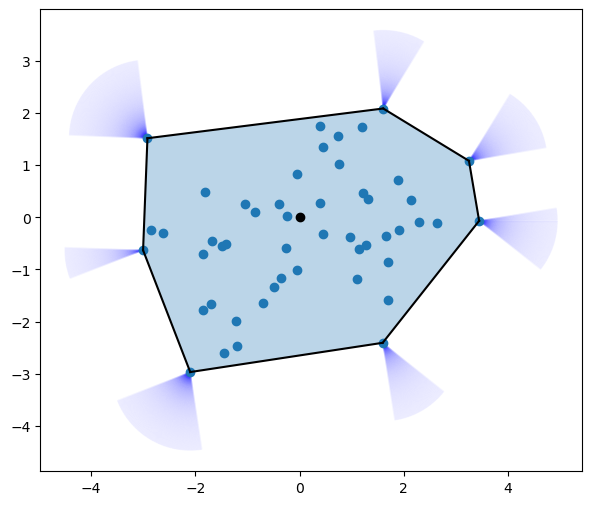

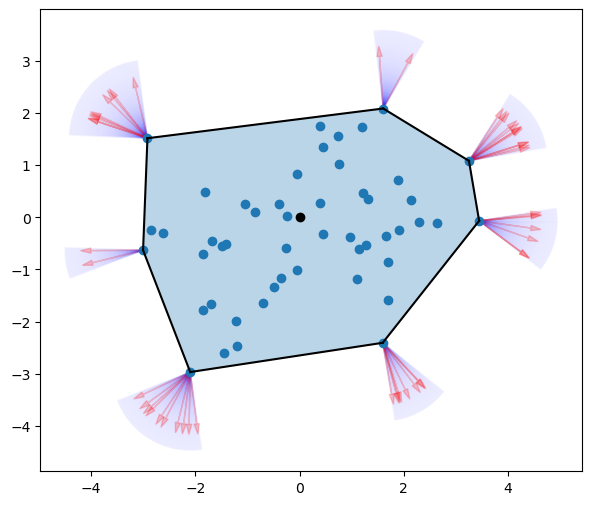

[-0.394 -0.273] [[0.069 -0.016]
 [-0.016 0.130]]


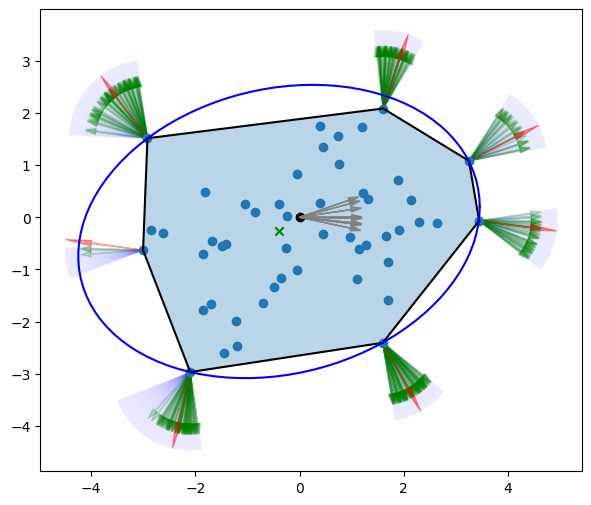

In [21]:
if __name__ == "__main__":
    n = 50
    # n = 10

    """
    Create a set of random points in 2D.
    """
    X = sample_rotated(n)
    # X = sample_sphere(n)
    # X[1] = [-0.750, -1.430]
    # X = np.array([[1, 0], [-1, 0], [0, -1], [0, 0.9]])
    # print(X)
    # X = sample_input()
    """
    Plot the convex hull of the points.
    """
    hull = ConvexHull(X)
    plt = plots(X, hull)
    x = plt.Plain()
    x.show()
    plt = plots(X, hull)
    x = plt.AllviaExtents()
    x.show()
    plt = plots(X, hull)
    x = plt.AllviaMVEE()
    # x = plt.plot_MVEE()
    x.show()